In [1]:
import sys
sys.path.append('/home/yja6qa/arepo_package/')

import arepo_package
import scipy.interpolate
import h5py
import os
import numpy as np
import plotting
from brahma_analysis import *
from sklearn.linear_model import LinearRegression

%matplotlib inline

h = 0.6774
radiative_efficiency=0.2

In [2]:
modelTNG = LinearRegression()
model=LinearRegression()

Illustris_TNG = np.array([2.587301587301587, 9.627450980392155,2.4761904761904763, 9.352941176470587,2.373015873015873, 
                 9.117647058823529,2.2777777777777777, 8.88235294117647,2.142857142857143, 8.549019607843135,
                 2.0396825396825395, 8.313725490196077,1.996031746031746, 8.196078431372548])

Illustris = np.array([2.5555555555555554, 10.017740429505135,2.4126984126984126, 9.482726423902893,
                      2.317460317460317, 9.126050420168067,2.238095238095238, 8.828820417055711,2.142857142857143, 
                      8.491752256458138,2.0436507936507935, 8.11531279178338,2, 7.9567382508558975])

xs=list(np.arange(0,14,2))
ys=list(np.arange(1,15,2))

modelxTNG=Illustris_TNG[xs].reshape(-1, 1)
modelyTNG=Illustris_TNG[ys].reshape(-1, 1)

modelx=Illustris[xs].reshape(-1, 1)
modely=Illustris[ys].reshape(-1, 1)

modelTNG.fit(modelxTNG,modelyTNG)
model.fit(modelx,modely)

x=np.linspace(0.75,2.5,100)
TNGy=modelTNG.coef_*x + modelTNG.intercept_
y=model.coef_*x + model.intercept_

In [3]:
Korm_Ho_2013=np.array([1.7222222222222223, 5.980392156862745,1.8611111111111112, 6.568627450980392,1.9801587301587302, 7.098039215686274,2.0912698412698414, 7.568627450980392,2.1666666666666665, 7.901960784313726,2.253968253968254, 8.294117647058824,2.365079365079365, 8.784313725490197,2.492063492063492, 9.333333333333334,2.575396825396825, 9.686274509803923])

model=LinearRegression()

KH13_x = list(np.arange(0,len(Korm_Ho_2013)-2,2))
KH13_y=list(np.arange(1,len(Korm_Ho_2013)-1,2))

modelx=Korm_Ho_2013[KH13_x].reshape(-1, 1)
modely=Korm_Ho_2013[KH13_y].reshape(-1, 1)

model.fit(modelx,modely)

xfit=np.linspace(0.75,2.5,100)
KH13_yfit=model.coef_*xfit + model.intercept_

Korm_Ho_M_Mstar=np.array([8.017615886326578, 5.212962962962962,8.274545772187281, 5.509259259259259,8.424935942231539, 5.685185185185185,8.581586303284416, 5.87037037037037,11.188358956440716, 8.916666666666666,10.724638947123225, 8.37962962962963,10.42388772420219, 8.018518518518519,9.809777544840438, 7.305555555555555,9.346057535522945, 6.768518518518518,9.045306312601909, 6.4074074074074066,8.731976473328675, 6.046296296296296,11.031679478220358, 8.74074074074074])

model=LinearRegression()

KH13_M_Mstar_x = list(np.arange(0,len(Korm_Ho_M_Mstar)-2,2))
KH13_M_Mstar_y=list(np.arange(1,len(Korm_Ho_M_Mstar)-1,2))

modelx=Korm_Ho_M_Mstar[KH13_M_Mstar_x].reshape(-1, 1)
modely=Korm_Ho_M_Mstar[KH13_M_Mstar_y].reshape(-1, 1)

model.fit(modelx,modely)

xfit_M_Mstar=np.linspace(7,12,100)
KH13_M_Mstar_yfit=model.coef_*xfit_M_Mstar + model.intercept_

In [4]:
Maiolino_et_al = np.array([1.9268858800773696, 5.656560658539877,1.6406189555125728, 6.172349421978319,1.7705996131528048, 6.298367144977734,1.872727272727273, 6.564324591786245,1.7705996131528048, 7.693715982187037,1.642166344294004, 7.707210651792542,1.9067698259187622, 7.88941118258288,1.928433268858801, 7.493747469749449,1.9315280464216635, 7.284400161936036,1.9021276595744683, 7.238315865233234,1.8541586073500969, 7.2157572758760296,1.9593810444874276, 7.132832531150196,1.9500967117988397, 7.353897710404391,1.9485493230174082, 6.865548108497144,1.9222437137330757, 6.8194188295623235])

Maiolino_x = Maiolino_et_al[list(np.arange(0,len(Maiolino_et_al)-2,2))]
Maiolino_y = Maiolino_et_al[list(np.arange(1,len(Maiolino_et_al)-1,2))]


Maiolino_M_Mstar = np.array([8.884142790589332, 5.6574074074074066,8.894945259725134, 6.222222222222221,9.78185418122525, 6.185185185185185,10.177702073142324, 6.305555555555555,10.173334498020033, 7.694444444444444,10.650681341719077, 7.898148148148148,9.770760540414628, 7.712962962962963,8.878348474260424, 7.5,8.43256464011181, 7.259259259259259,8.331586303284416, 7.37037037037037,8.093058467272304, 7.222222222222221,8.048771255532262, 7.305555555555555,7.778855112974609, 7.138888888888888,7.8677789424644775, 6.861111111111111,8.113993710691824, 6.564814814814814,8.377329373398556, 6.824074074074074])

Maiolino_x_M_Mstar = Maiolino_M_Mstar[list(np.arange(0,len(Maiolino_M_Mstar)-2,2))]
Maiolino_y_M_Mstar = Maiolino_M_Mstar[list(np.arange(1,len(Maiolino_M_Mstar)-1,2))]

# Comparing with Illustris TNG

In [4]:
bFOF=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
TNGz0=ReadBrahmaData('Brahma_Data/TNG_z0')

# Grabbing x-sigma values
sigmaxTNG=np.array([sigma[0] for sigma in TNGz0[4]])
sigmax1=np.array([sigma[0] for sigma in bFOF[5]])

M_TNGz0 = np.array(TNGz0[0])
M_bFOF = np.array(bFOF[0])

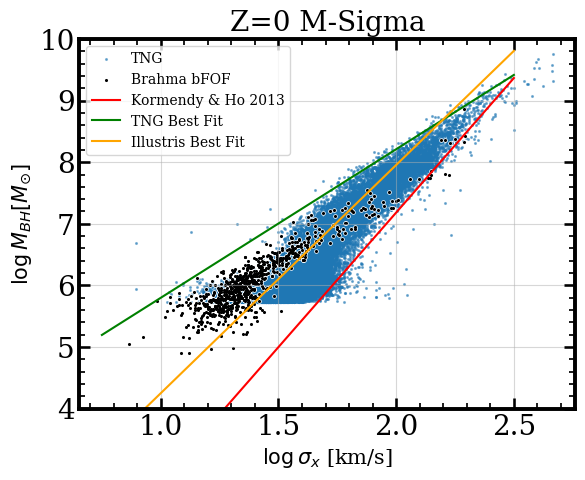

In [6]:
plt.scatter(np.log10(sigmaxTNG),np.log10(M_TNGz0),s=1.5,label="TNG",alpha=0.5)
plt.scatter(np.log10(sigmax1),np.log10(M_bFOF),s=5,color='white',alpha=1)
plt.scatter(np.log10(sigmax1),np.log10(M_bFOF),s=1.5,label="Brahma bFOF",color='black',alpha=1)
plt.plot(xfit,KH13_yfit[0],label='Kormendy & Ho 2013',color='red')
plt.plot(x,TNGy[0],label='TNG Best Fit',color='green')
plt.plot(x,y[0],label='Illustris Best Fit',color='orange')

plt.xlabel('$\log \sigma_{x}$ [km/s]',size=15)
plt.ylabel('$\log M_{BH} [M_{\odot}]$',size=15)

plt.ylim(4,10)
plt.grid(alpha=0.5)
plt.legend(fontsize=10)
    
plt.title('Z=0 M-Sigma',size=20)

plt.savefig('Z0_TNG_bFOF_comparison.png')

In [7]:
bFOFnowind=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_nowind_z0')
bFOF=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')

# Grabbing x-sigma values
sigmaxnowind=np.array(bFOFnowind[5])[:,0]
sigmax=np.array(bFOF[5])[:,0]

M_bFOF_nowind = np.array(bFOFnowind[0])
M_bFOF = np.array(bFOF[0])

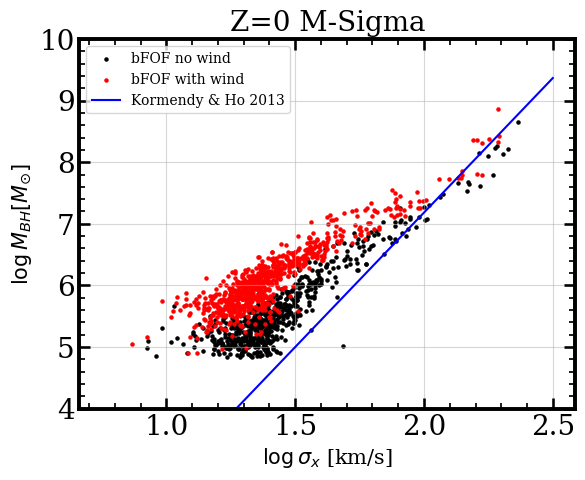

In [13]:
# plt.scatter(np.log10(sigmaxTNG),np.log10(M_TNGz0),s=1.5,label="TNG",alpha=0.5)
plt.scatter(np.log10(sigmaxnowind),np.log10(M_bFOF_nowind),s=5,label='bFOF no wind',color='black',alpha=1)
plt.scatter(np.log10(sigmax),np.log10(M_bFOF),s=5,label="bFOF with wind",color='red',alpha=1)
plt.plot(xfit,KH13_yfit[0],label='Kormendy & Ho 2013',color='blue')
# plt.plot(x,TNGy[0],label='TNG Best Fit',color='green')
# plt.plot(x,y[0],label='Illustris Best Fit',color='orange')

plt.xlabel('$\log \sigma_{x}$ [km/s]',size=15)
plt.ylabel('$\log M_{BH} [M_{\odot}]$',size=15)

plt.ylim(4,10)
plt.grid(alpha=0.5)
plt.legend(fontsize=10)
    
plt.title('Z=0 M-Sigma',size=20)

plt.savefig('Plots/bFOF_nowind.png')

# Comparing to Illustris

In [13]:
a = 1/(1+5)

bFOFz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
bFOFz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z5')
Illz0=ReadBrahmaData('Brahma_Data/Illustris_z0')
Illz5=ReadBrahmaData('Brahma_Data/Illustris_z5')

# Grabbing x-sigma values
sigmaxIllz0 = np.array(Illz0[4])[:,0]
sigmazIllz5 = np.array(Illz5[4])[:,0]*a # Correct units for z=5
sigmaxbFOFz0 = np.array(bFOFz0[5])[:,0] 
sigmaxbFOFz5 = np.array(bFOFz5[5])[:,0]*a # Correct units for z=5

M_Illz0 = np.array(Illz0[0])
M_bFOFz0 = np.array(bFOFz0[0])
M_Illz5 = np.array(Illz5[0])
M_bFOFz5 = np.array(bFOFz5[0])

Mstar_Illz5 = np.array([np.sum(Illz5[2][i]) for i in range(len(Illz5[2]))])
Mstar_bFOFz5 = np.array([np.sum(bFOFz5[1][i]) for i in range(len(bFOFz5[1]))])

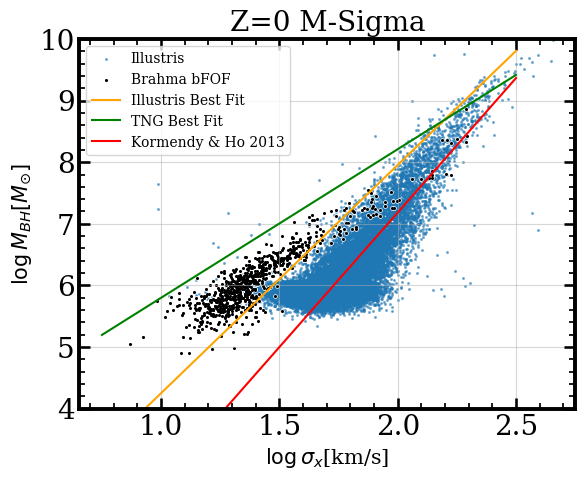

In [9]:
plt.scatter(np.log10(sigmaxIll),np.log10(M_Illz0),s=1.5,label="Illustris",alpha=0.5)
plt.scatter(np.log10(sigmax1),np.log10(M_bFOF),s=5,color='white',alpha=1)
plt.scatter(np.log10(sigmax1),np.log10(M_bFOF),s=1.5,label="Brahma bFOF",color='black',alpha=1)
plt.plot(x,y[0],label='Illustris Best Fit',color='orange')
plt.plot(x,TNGy[0],label='TNG Best Fit',color='green')
plt.plot(xfit,KH13_yfit[0],label='Kormendy & Ho 2013',color='red')

plt.xlabel(r'$\log \sigma_{x} $[km/s]',size=15)
plt.ylabel(r'$\log M_{BH} [M_{\odot}]$',size=15)

plt.ylim(4,10)
plt.grid(alpha=0.5)
plt.legend(fontsize=10)
    
plt.title('Z=0 M-Sigma',size=20)

plt.savefig('Z0_Illustris')#_bFOF_comparison.png')

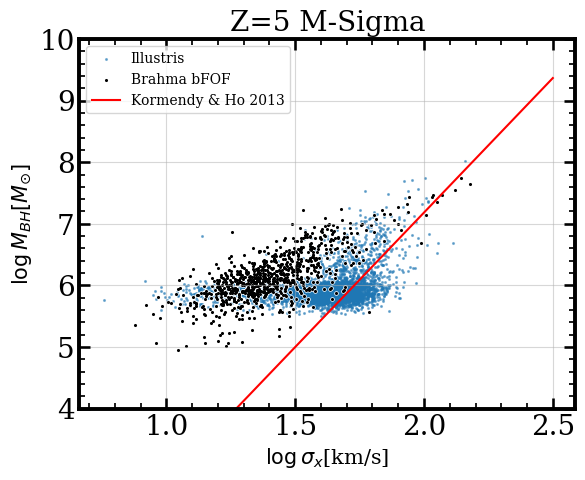

In [11]:
plt.scatter(np.log10(sigmazIllz5),np.log10(M_Illz5),s=1.5,label="Illustris",alpha=0.5)
plt.scatter(np.log10(sigmaxbFOFz5),np.log10(M_bFOFz5),s=5,color='white',alpha=1)
plt.scatter(np.log10(sigmaxbFOFz5),np.log10(M_bFOFz5),s=1.5,label="Brahma bFOF",color='black',alpha=1)
# plt.plot(x,y[0],label='Illustris Best Fit',color='orange')
# plt.plot(x,TNGy[0],label='TNG Best Fit',color='green')
plt.plot(xfit_M_Mstar,KH13_yfit[0],label='Kormendy & Ho 2013',color='red')

plt.xlabel(r'$\log \sigma_{x} $[km/s]',size=15)
plt.ylabel(r'$\log M_{BH} [M_{\odot}]$',size=15)

plt.ylim(4,10)
plt.grid(alpha=0.5)
plt.legend(fontsize=10)
    
plt.title('Z=5 M-Sigma',size=20)

plt.savefig('Z5_Illustris')

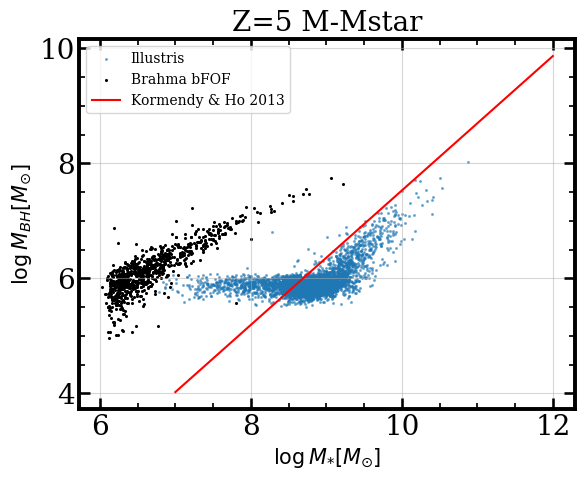

In [16]:
plt.scatter(np.log10(Mstar_Illz5),np.log10(M_Illz5),s=1.5,label="Illustris",alpha=0.5)
plt.scatter(np.log10(Mstar_bFOFz5),np.log10(M_bFOFz5),s=5,color='white',alpha=1)
plt.scatter(np.log10(Mstar_bFOFz5),np.log10(M_bFOFz5),s=1.5,label="Brahma bFOF",color='black',alpha=1)
# plt.plot(x,y[0],label='Illustris Best Fit',color='orange')
# plt.plot(x,TNGy[0],label='TNG Best Fit',color='green')
plt.plot(xfit_M_Mstar,KH13_M_Mstar_yfit[0],label='Kormendy & Ho 2013',color='red')

plt.xlabel(r'$\log M_{*} [M_{\odot}]$',size=15)
plt.ylabel(r'$\log M_{BH} [M_{\odot}]$',size=15)

# plt.ylim(4,10)
plt.grid(alpha=0.5)
plt.legend(fontsize=10)
    
plt.title('Z=5 M-Mstar',size=20)

plt.savefig('Z5_Illustris_M_Mstar')

# Comparing different Brahma boxes!

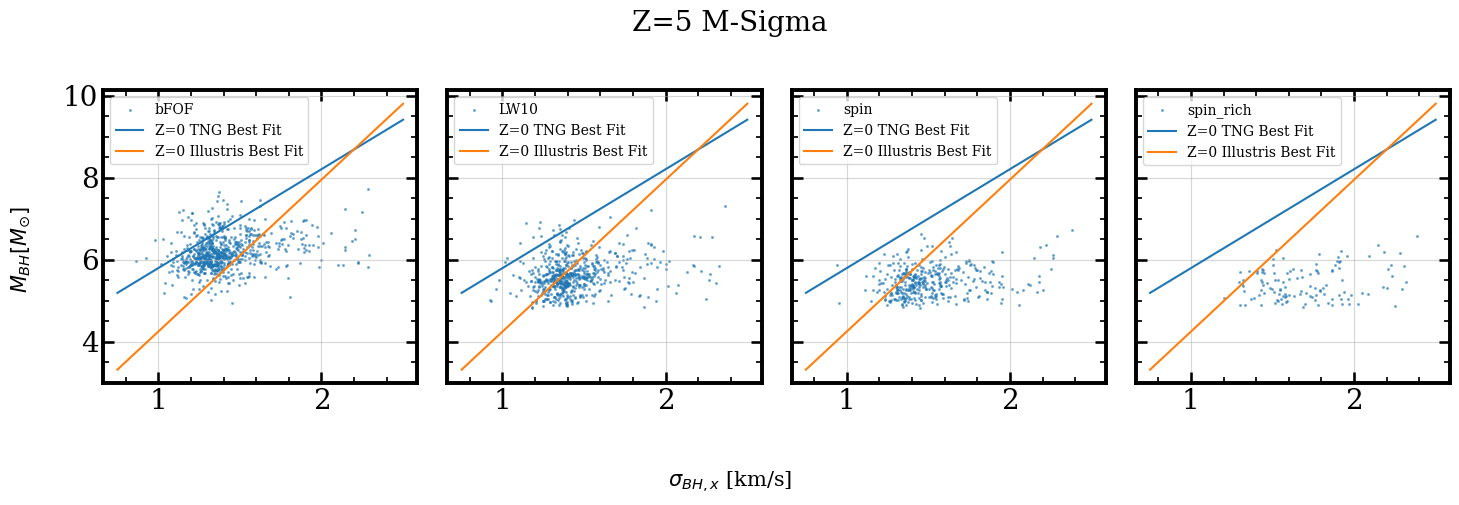

In [36]:
bFOFz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z5')
LW10=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z5')
spin = ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z5')
spin_rich=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z5')

# Grabbing x-sigma values
Sigma_bFOF = np.log10(bFOFz5[5])[:,0]
Sigma_LW10 = np.log10(LW10[5])[:,0]
Sigma_spin = np.log10(spin[5])[:,0]
Sigma_rich = np.log10(rich[5])[:,0]

M_bFOF = np.array(bFOFz5[0])[nonzero1]
M_LW10 = np.array(LW10[0])[nonzero2]
M_spin = np.array(spin[0])[nonzero3]
M_spin_rich = np.array(spin_rich[0])[nonzero4]

# Plotting
f,axs = plt.subplots(1,4,sharey = True,sharex=True,figsize = (15,5))

axs[0].scatter(np.log10(sigmax1),np.log10(M_bFOF),s=1.5,label="bFOF",alpha=0.5)
axs[1].scatter(np.log10(sigmax2),np.log10(M_LW10),s=1.5,label="LW10",alpha=0.5)
axs[2].scatter(np.log10(sigmax3),np.log10(M_spin),s=1.5,label="spin",alpha=0.5)
axs[3].scatter(np.log10(sigmax4),np.log10(M_spin_rich),s=1.5,label="spin_rich",alpha=0.5)

# plt.plot(x,TNGy[0],label='TNG Best Fit')
# plt.plot(x,y[0],label='Illustris Best Fit')
f.supxlabel('$\sigma_{BH,x}$ [km/s]',size=15)
f.supylabel('$M_{BH} [M_{\odot}]$',size=15)

for ax in axs:
    ax.grid(alpha=0.5)
    ax.plot(x,TNGy[0],label='Z=0 TNG Best Fit')
    ax.plot(x,y[0],label='Z=0 Illustris Best Fit')
    ax.legend(fontsize=10)
    
f.suptitle('Z=5 M-Sigma',size=20)
f.tight_layout()

plt.savefig('Z5_Comparison.png')

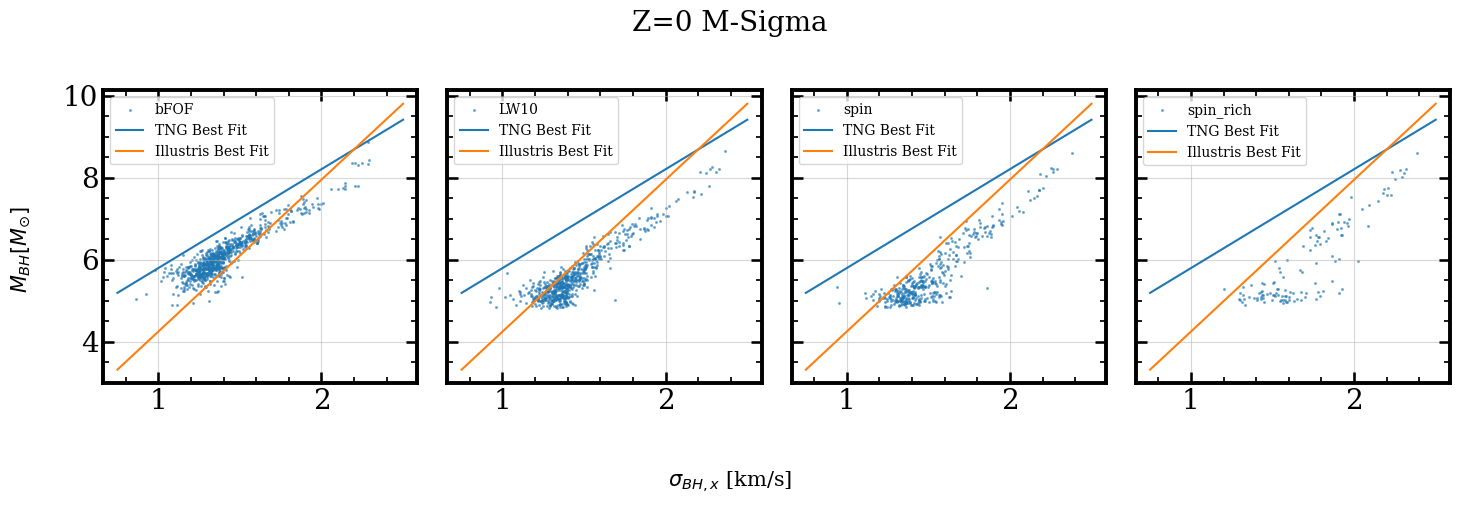

In [37]:
bFOF=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
LW10=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z0')
spin = ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z0')
spin_rich=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z0')

# Grabbing x-sigma values
Sigma_bFOF = np.log10(bFOF[5])[:,0]
Sigma_LW10 = np.log10(LW10[5])[:,0]
Sigma_spin = np.log10(spin[5])[:,0]
Sigma_rich = np.log10(rich[5])[:,0]

M_bFOF = np.array(bFOF[0])[nonzero1]
M_LW10 = np.array(LW10[0])[nonzero2]
M_spin = np.array(spin[0])[nonzero3]
M_spin_rich = np.array(spin_rich[0])[nonzero4]

# Plotting
f,axs = plt.subplots(1,4,sharey = True,sharex=True,figsize = (15,5))

axs[0].scatter(np.log10(sigmax1),np.log10(M_bFOF),s=1.5,label="bFOF",alpha=0.5)
axs[1].scatter(np.log10(sigmax2),np.log10(M_LW10),s=1.5,label="LW10",alpha=0.5)
axs[2].scatter(np.log10(sigmax3),np.log10(M_spin),s=1.5,label="spin",alpha=0.5)
axs[3].scatter(np.log10(sigmax4),np.log10(M_spin_rich),s=1.5,label="spin_rich",alpha=0.5)

# plt.plot(x,TNGy[0],label='TNG Best Fit')
# plt.plot(x,y[0],label='Illustris Best Fit')
f.supxlabel('$\sigma_{BH,x}$ [km/s]',size=15)
f.supylabel('$M_{BH} [M_{\odot}]$',size=15)

for ax in axs:
    ax.grid(alpha=0.5)
    ax.plot(x,TNGy[0],label='TNG Best Fit')
    ax.plot(x,y[0],label='Illustris Best Fit')
    ax.legend(fontsize=10)
    
f.suptitle('Z=0 M-Sigma',size=20)
f.tight_layout()

plt.savefig('Z0_Comparison.png')

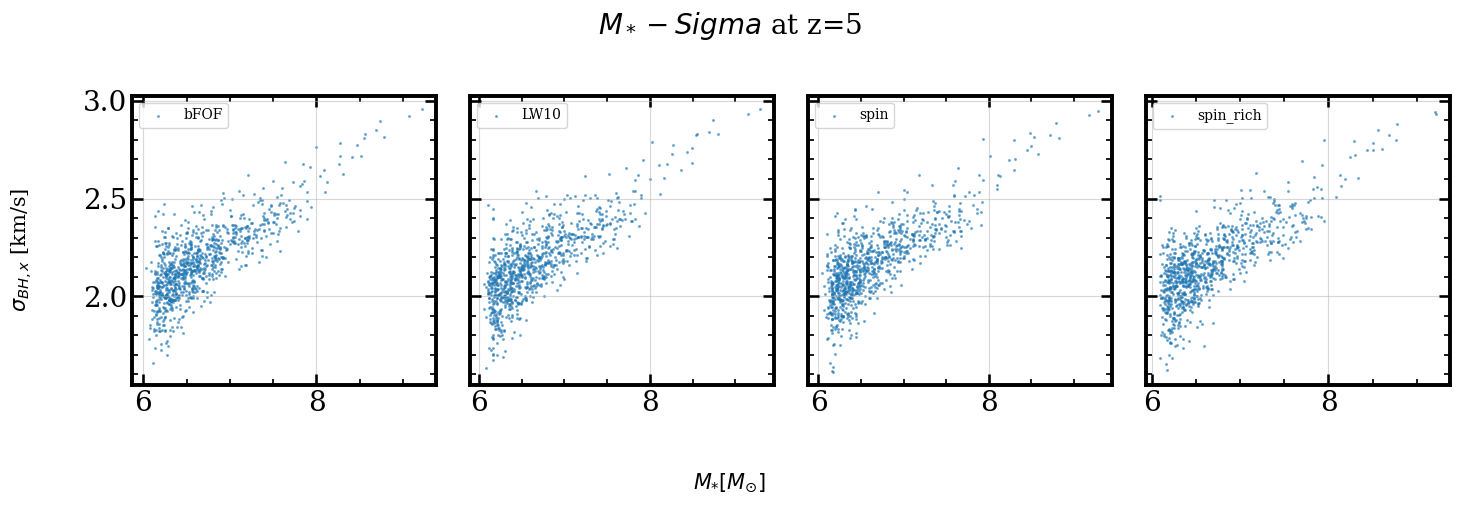

In [39]:
bFOFz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z5')
LW10z5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z5')
spinz5 = ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z5')
richz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z5')

# Grabbing x-sigma values
sigmax1 = np.log10(bFOFz5[6])[:,0]
sigmax2 = np.log10(LW10z5[6])[:,0]
sigmax3 = np.log10(spinz5[6])[:,0]
sigmax4 = np.log10(richz5[6])[:,0]

Mstar_bFOF = np.array([np.sum(bFOFz5[2][i]) for i in range(len(bFOFz5[2]))])
Mstar_LW10 = np.array([np.sum(LW10z5[2][i]) for i in range(len(LW10z5[2]))])
Mstar_spin = np.array([np.sum(spinz5[2][i]) for i in range(len(spinz5[2]))])
Mstar_rich = np.array([np.sum(richz5[2][i]) for i in range(len(richz5[2]))])

# Plotting
f,axs = plt.subplots(1,4,sharey = True,figsize = (15,5))

axs[0].scatter(np.log10(Mstar_bFOF),sigmax1,s=1.5,label="bFOF",alpha=0.5)
axs[1].scatter(np.log10(Mstar_LW10),sigmax2,s=1.5,label="LW10",alpha=0.5)
axs[2].scatter(np.log10(Mstar_spin),sigmax3,s=1.5,label="spin",alpha=0.5)
axs[3].scatter(np.log10(Mstar_rich),sigmax4,s=1.5,label="spin_rich",alpha=0.5)

# plt.plot(x,TNGy[0],label='TNG Best Fit')
# plt.plot(x,y[0],label='Illustris Best Fit')
f.supylabel('$\sigma_{BH,x}$ [km/s]',size=15)
f.supxlabel('$M_{*} [M_{\odot}]$',size=15)

for ax in axs:
    ax.grid(alpha=0.5)
    ax.legend(fontsize=10)
    
f.suptitle('$M_*-Sigma$ at z=5',size=20)
f.tight_layout()

plt.savefig('Plots/Z5_Mstar_Sigma_Comparison.png')

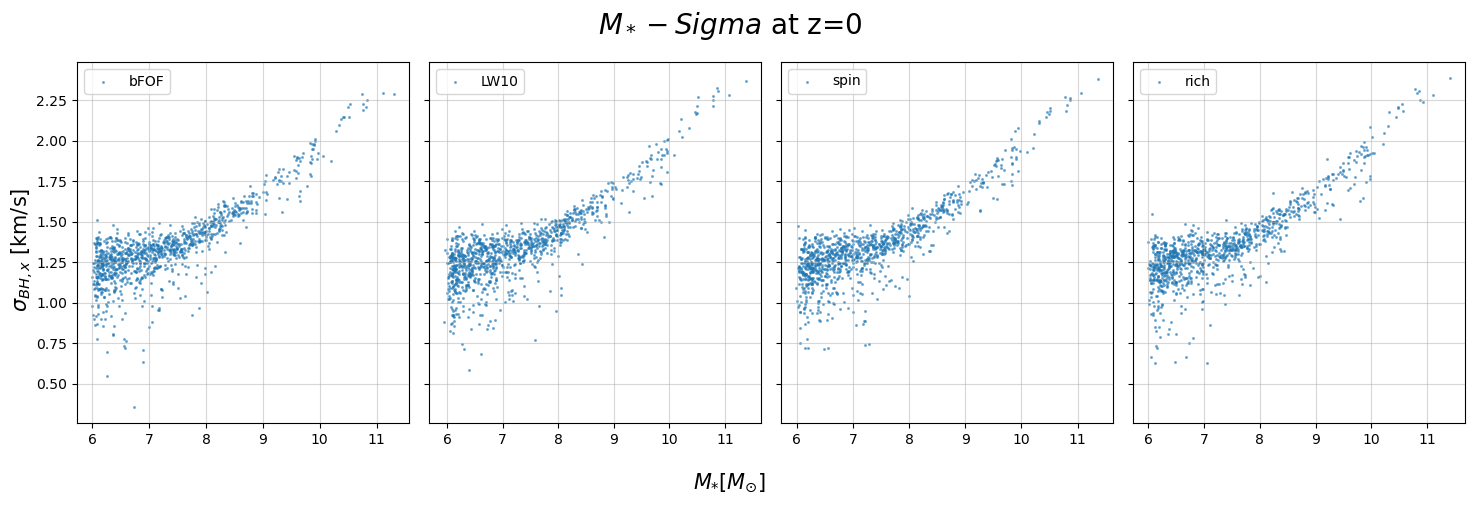

In [12]:
bFOFz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
LW10z0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z0')
spinz0 = ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z0')
richz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z0')

MstarsbFOF = [np.sum(bFOFz0[2][i]) for i in range(len(bFOFz0[2]))]
MstarsLW10 = [np.sum(LW10z0[2][i]) for i in range(len(LW10z0[2]))]
Mstarsspin = [np.sum(spinz0[2][i]) for i in range(len(spinz0[2]))]
Mstarsrich = [np.sum(richz0[2][i]) for i in range(len(richz0[2]))]

# Plotting
f,axs = plt.subplots(1,4,sharey = True,figsize = (15,5))

axs[0].scatter(np.log10(MstarsbFOF),np.log10(bFOFz0[6])[:,0],s=1.5,label="bFOF",alpha=0.5)
axs[1].scatter(np.log10(MstarsLW10),np.log10(LW10z0[6])[:,0],s=1.5,label="LW10",alpha=0.5)
axs[2].scatter(np.log10(Mstarsspin),np.log10(spinz0[6])[:,0],s=1.5,label="spin",alpha=0.5)
axs[3].scatter(np.log10(Mstarsrich),np.log10(richz0[6])[:,0],s=1.5,label="rich",alpha=0.5)

# plt.plot(x,TNGy[0],label='TNG Best Fit')
# plt.plot(x,y[0],label='Illustris Best Fit')
f.supxlabel('$M_{*} [M_{\odot}]$',size=15)
f.supylabel('$\sigma_{BH,x}$ [km/s]',size=15)

for ax in axs:
    ax.grid(alpha=0.5)
    ax.legend(fontsize=10)
    
f.suptitle('$M_*-Sigma$ at z=0',size=20)
f.tight_layout()

plt.savefig('Z0_Mstar_Sigma_Comparison.png')

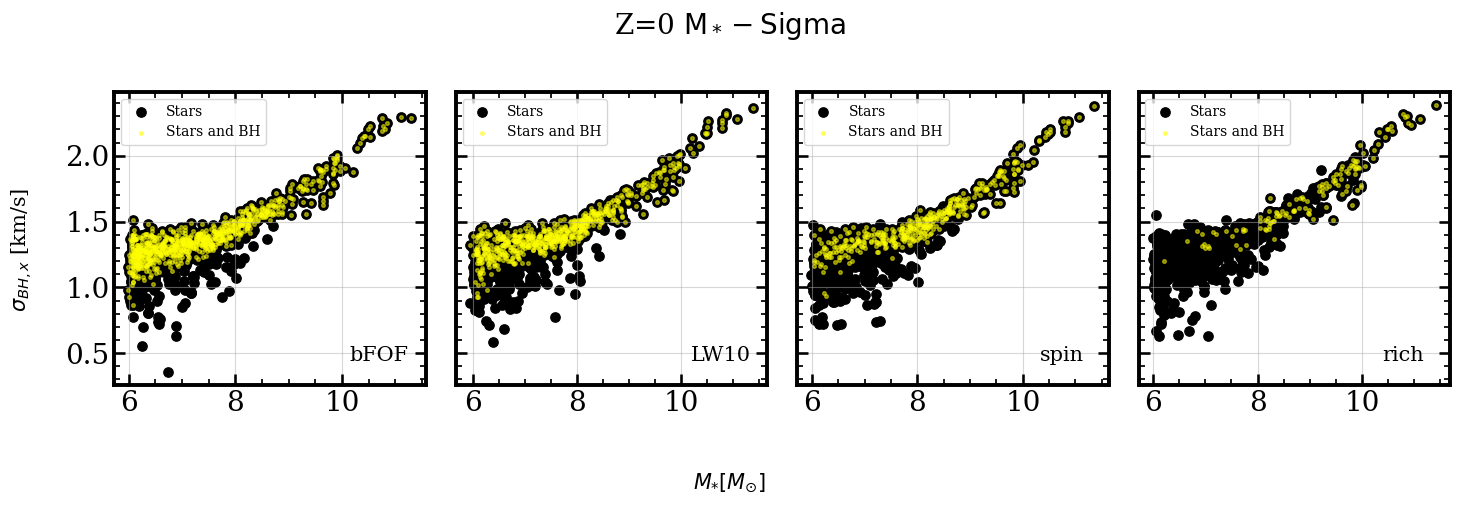

In [9]:
bFOFz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
LW10z0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z0')
spinz0 = ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z0')
richz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z0')

MstarsbFOF = [np.sum(bFOFz0[2][i]) for i in range(len(bFOFz0[2]))]
MstarsLW10 = [np.sum(LW10z0[2][i]) for i in range(len(LW10z0[2]))]
Mstarsspin = [np.sum(spinz0[2][i]) for i in range(len(spinz0[2]))]
Mstarsrich = [np.sum(richz0[2][i]) for i in range(len(richz0[2]))]

MstarsbFOFBH = [np.sum(bFOFz0[1][i]) for i in range(len(bFOFz0[1]))]
MstarsLW10BH = [np.sum(LW10z0[1][i]) for i in range(len(LW10z0[1]))]
MstarsspinBH = [np.sum(spinz0[1][i]) for i in range(len(spinz0[1]))]
MstarsrichBH = [np.sum(richz0[1][i]) for i in range(len(richz0[1]))]

# Plotting
f,axs = plt.subplots(1,4,sharey = True,figsize = (15,5))

axs[0].scatter(np.log10(MstarsbFOF),np.log10(bFOFz0[6])[:,0],s=45,color='black',label="Stars")
axs[1].scatter(np.log10(MstarsLW10),np.log10(LW10z0[6])[:,0],s=45,color='black',label="Stars")
axs[2].scatter(np.log10(Mstarsspin),np.log10(spinz0[6])[:,0],s=45,color='black',label="Stars")
axs[3].scatter(np.log10(Mstarsrich),np.log10(richz0[6])[:,0],s=45,color='black',label="Stars")

axs[0].scatter(np.log10(MstarsbFOFBH),np.log10(bFOFz0[5])[:,0],s=7,color='yellow',label="Stars and BH",alpha=0.5)
axs[1].scatter(np.log10(MstarsLW10BH),np.log10(LW10z0[5])[:,0],s=7,color='yellow',label="Stars and BH",alpha=0.5)
axs[2].scatter(np.log10(MstarsspinBH),np.log10(spinz0[5])[:,0],s=7,color='yellow',label="Stars and BH",alpha=0.5)
axs[3].scatter(np.log10(MstarsrichBH),np.log10(richz0[5])[:,0],s=7,color='yellow',label="Stars and BH",alpha=0.5)

axs[0].text(0.85, 0.1, 'bFOF', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes,size=15)
axs[1].text(0.85, 0.1, 'LW10', horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes,size=15)
axs[2].text(0.85, 0.1, 'spin', horizontalalignment='center', verticalalignment='center', transform=axs[2].transAxes,size=15)
axs[3].text(0.85, 0.1, 'rich', horizontalalignment='center', verticalalignment='center', transform=axs[3].transAxes,size=15)

f.supxlabel('$M_{*} [M_{\odot}]$',size=15)
f.supylabel('$\sigma_{BH,x}$ [km/s]',size=15)

for ax in axs:
    ax.grid(alpha=0.5)
    ax.legend(fontsize=10)
    
f.suptitle('Z=0 $\mathrm{M_*-Sigma}$',size=20)
f.tight_layout()

plt.savefig('Plots/Z0_Mstar_Sigma_Comparison_with_BH.png')

## Plotting mean trends in same plot to compare

In [17]:
bFOF=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
LW10=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z0')
spin = ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z0')
rich=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z0')

# Grabbing x-sigma values
Sigma_bFOF = np.log10(bFOF[5])[:,0]
Sigma_LW10 = np.log10(LW10[5])[:,0]
Sigma_spin = np.log10(spin[5])[:,0]
Sigma_rich = np.log10(rich[5])[:,0]

M_bFOF = np.log10(bFOF[0])
M_LW10 = np.log10(LW10[0])
M_spin = np.log10(spin[0])
M_rich = np.log10(rich[0])

# Initialize models
modelbFOF = LinearRegression()
modelLW10 = LinearRegression()
modelspin = LinearRegression()
modelrich = LinearRegression()

# Reshape arrays
modelxbFOF=Sigma_bFOF.reshape(-1, 1)
modelxLW10=Sigma_LW10.reshape(-1, 1)
modelxspin=Sigma_spin.reshape(-1, 1)
modelxrich=Sigma_rich.reshape(-1, 1)

modelybFOF=M_bFOF.reshape(-1, 1)
modelyLW10=M_LW10.reshape(-1, 1)
modelyspin=M_spin.reshape(-1, 1)
modelyrich=M_rich.reshape(-1, 1)

# Fit the models
modelbFOF.fit(modelxbFOF,modelybFOF)
modelLW10.fit(modelxLW10,modelyLW10)
modelspin.fit(modelxspin,modelyspin)
modelrich.fit(modelxrich,modelyrich)

# Make lines of best fit
x=np.linspace(0.75,2.5,100)
bFOFy=modelbFOF.coef_*x + modelbFOF.intercept_
LW10y=modelLW10.coef_*x + modelLW10.intercept_
spiny=modelspin.coef_*x + modelspin.intercept_
richy=modelrich.coef_*x + modelrich.intercept_

# Calculate residuals to get error bars
bFOF_expected = modelbFOF.predict(modelxbFOF)
LW10_expected = modelLW10.predict(modelxLW10)
spin_expected = modelspin.predict(modelxspin)
rich_expected = modelrich.predict(modelxrich)

bFOF_std = np.std(bFOFy-bFOF_expected)
LW10_std = np.std(LW10y-LW10_expected)
spin_std = np.std(spiny-spin_expected)
rich_std = np.std(richy-rich_expected)

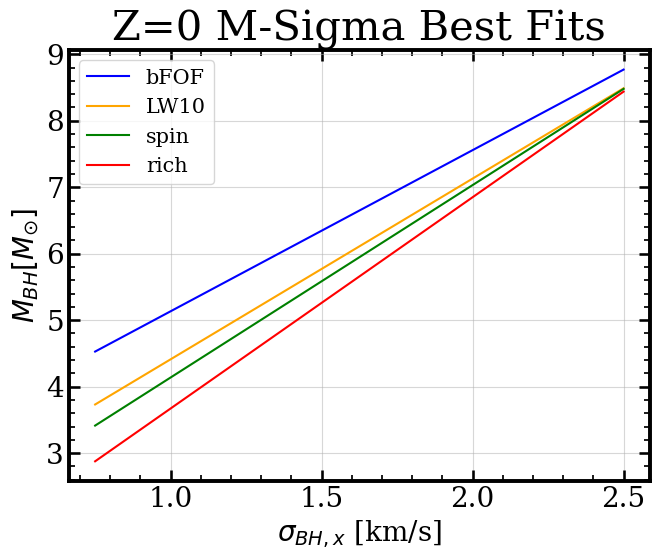

In [34]:
# Plotting
plt.figure(figsize = (7,6))

plt.plot(x,bFOFy[0],label='bFOF',color = 'blue')
plt.plot(x,LW10y[0],label='LW10',color = 'orange')
plt.plot(x,spiny[0],label='spin',color = 'green')
plt.plot(x,richy[0],label='rich',color = 'red')

# plt.fill_between(x,bFOFy[0]+bFOF_std,bFOFy[0]-bFOF_std,color = 'blue',alpha=0.25)
# plt.fill_between(x,LW10y[0]+LW10_std,LW10y[0]-LW10_std,color = 'orange',alpha=0.25)
# plt.fill_between(x,spiny[0]+spin_std,spiny[0]-spin_std,color = 'green',alpha=0.25)
# plt.fill_between(x,richy[0]+rich_std,richy[0]-rich_std,color = 'red',alpha=0.25)

# plt.plot(x,TNGy[0],label='TNG Best Fit')
# plt.plot(x,y[0],label='Illustris Best Fit')
plt.xlabel('$\sigma_{BH,x}$ [km/s]',size=20)
plt.ylabel('$M_{BH} [M_{\odot}]$',size=20)

plt.legend(fontsize=15)
plt.grid(alpha=0.5)
    
plt.title('Z=0 M-Sigma Best Fits',size=30)
plt.tight_layout()

plt.savefig('Plots/Z0_Best_Fits.png')

# Binned MBH - Sigma

In [6]:
bFOFz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
LW10z0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z0')
spinz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z0')
richz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z0')

bFOFz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z5')
LW10z5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z5')
spinz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z5')
richz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z5')

# Illustris and TNG 
Illz0=ReadBrahmaData('Brahma_Data/Illustris_z0')
TNGz0=ReadBrahmaData('Brahma_Data/TNG_z0')

Illz5=ReadBrahmaData('Brahma_Data/Illustris_z5')
TNGz5=ReadBrahmaData('Brahma_Data/TNG_z5')

In [7]:
# Scale factor to convert to peculiar velocities
a = 1/(1+5) # For redshift z=5; a=1 for z=0

# Storing the x sigma's
Sigma_bFOFz0 = np.array(bFOFz0[5])[:,0]
Sigma_LW10z0 = np.array(LW10z0[5])[:,0]
Sigma_spinz0 = np.array(spinz0[5])[:,0]
Sigma_richz0 = np.array(richz0[5])[:,0]

Sigma_bFOFz5 = np.array(bFOFz5[5])[:,0]*a
Sigma_LW10z5 = np.array(LW10z5[5])[:,0]*a
Sigma_spinz5 = np.array(spinz5[5])[:,0]*a
Sigma_richz5 = np.array(richz5[5])[:,0]*a

In [8]:
# List of BH Masses
Prop2list=[[np.array(bFOFz5[0]),np.array(bFOFz0[0])],[np.array(LW10z5[0]),np.array(LW10z0[0])],
           [np.array(spinz5[0]),np.array(spinz0[0])],[np.array(richz5[0]),np.array(richz0[0])]]

# List of sigmas
Prop1list=[[Sigma_bFOFz5,Sigma_bFOFz0],[Sigma_LW10z5,Sigma_LW10z0],
           [Sigma_spinz5,Sigma_spinz0],[Sigma_richz5,Sigma_richz0]]

# list of redshifts; not sure why I put this here. Is this necessary?
outputz_list = [[4.995933468164624, 2.220446049250313e-16],[4.995933468164624, 2.220446049250313e-16],
                [4.995933468164624, 2.220446049250313e-16],[4.995933468164624, 2.220446049250313e-16]]

# Limits for making plot in log space
limits=[0.6,2.6]

In [9]:
redshifts=[5,0]
AllBoxMeans,AllBoxStdDevs,Xpoints = mean_trends(Prop1list,Prop2list,redshifts,limits,bins=10)

/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in s

In [16]:
# Binning as above for Illustris and Illustris TNG
Sigma_Illz0 = np.array(Illz0[4])[:,0]
Sigma_TNGz0 = np.array(TNGz0[4])[:,0]

Sigma_Illz5 = np.array(Illz5[4])[:,0]
Sigma_TNGz5 = np.array(TNGz5[4])[:,0]

IllProp1 = [[Sigma_Illz5,Sigma_Illz0],[Sigma_TNGz5,Sigma_TNGz0]]
IllProp2 = [[np.array(Illz5[0]),np.array(Illz0[0])],[np.array(TNGz5[0]),np.array(TNGz0[0])]]

redshiftIll = [5,0]

Ill_TNG_means,Ill_TNG_StdDevs,ILL_TNG_Xpoints = mean_trends(IllProp1,IllProp2,redshiftIll,limits,bins=10)

In [22]:
ILL_TNG_Xpoints

[array([0.71111111, 0.93333333, 1.15555556, 1.37777778, 1.6       ,
        1.82222222, 2.04444444, 2.26666667, 2.48888889]),
 array([1.01214111, 1.23436333, 1.45658555, 1.67880777, 1.90103   ,
        2.12325222, 2.34547444, 2.56769666, 2.78991888])]

In [21]:
Ill_TNG_means

array([[[       nan,        nan,        nan,        nan, 5.91456412,
         5.86367827, 5.87388325, 5.88953114, 5.95351052],
        [       nan, 6.90320726, 6.00688237, 5.90745471, 5.9079553 ,
         6.14197384, 7.19384127, 8.34223781, 9.14139572]],

       [[       nan,        nan, 5.86854469, 5.88606301, 5.85377314,
         5.85756434, 5.86468246, 6.03873462, 6.78449986],
        [5.87890319, 5.88701211, 5.9304214 , 6.45113701, 7.3919336 ,
         8.00765684, 8.69878267, 9.25384732,        nan]]])

In [19]:
Ill_TNG_StdDevs

array([[[       nan,        nan,        nan,        nan, 0.14971094,
         0.15707759, 0.10319016, 0.13602826, 0.23547662],
        [       nan, 0.78015753, 0.27666564, 0.13833428, 0.13176355,
         0.36518915, 0.56279066, 0.53188051, 0.53116622]],

       [[       nan,        nan, 0.00481859, 0.0929938 , 0.09296525,
         0.09183074, 0.10193023, 0.35702375, 0.58086346],
        [0.11170135, 0.1176867 , 0.14747634, 0.44161521, 0.33047424,
         0.26241163, 0.26626754, 0.26520274,        nan]]])

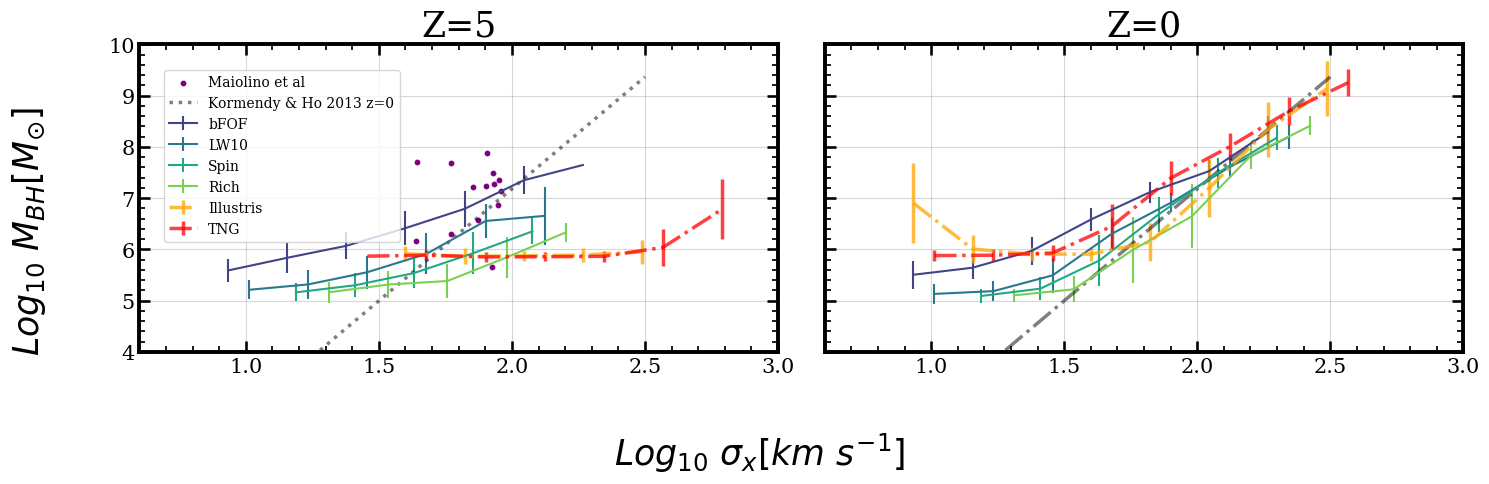

In [24]:
legend_names = ['bFOF','LW10','Spin','Rich']
axislabels = ['$Log_{10}\ \sigma_x [km\ s^{-1}]$','$Log_{10}\ M_{BH} [M_{\odot}]$ ']
tick_size=15
label_font_size=25
cmap = plt.get_cmap('viridis') # Choose uniform luminosity cmap

# f,axes=plot_brahma(AllBoxMeans,AllBoxStdDevs,Xpoints,redshifts,legend_names,axislabels,savefig = False)

f,axes = plt.subplots(1,2,figsize=(15,5),sharey=True,sharex=True)

for i in range(AllBoxMeans.shape[0]):
        for ii in range(len(redshifts)):
            
            if ii == 0:
                # There is probably a better solution to this, but I don't want to duplicate labels
                axes[ii].errorbar(Xpoints[i],AllBoxMeans[i,ii,:],yerr = AllBoxStdDevs[i,ii,:],
                                  label=legend_names[i],color = cmap(0.2+i*(0.8/AllBoxMeans.shape[0])))
            else:
                axes[ii].errorbar(Xpoints[i],AllBoxMeans[i,ii,:],yerr = AllBoxStdDevs[i,ii,:],
                                  color = cmap(0.2+i*(0.8/AllBoxMeans.shape[0])))

# Change the alpha and colors to make everything visible

axes.flat[0].scatter(Maiolino_x,Maiolino_y,label='Maiolino et al',color='purple',s=10) 

# Index for labeling figure titles
n=0

for ax in axes.flat:
    ax.set_xlim(0.6,3.0)
    ax.set_ylim(4,10)
    ax.grid(alpha = 0.5)
    ax.tick_params(labelsize=tick_size)
    ax.set_title('Z={}'.format(redshifts[n]),size = 25)
    n+=1
    
    if ax==axes.flat[0]:
        # ax.plot(x,TNGy[0],label='TNG Best Fit',ls='--',lw=2.5,alpha=0.75)
        # ax.plot(x,y[0],label='Illustris Best Fit',ls='--',lw=2.5,alpha=0.75)
        ax.plot(xfit,KH13_yfit[0],label='Kormendy & Ho 2013 z=0',ls='dotted',lw=2.5,alpha=0.5,color='black')
        ax.errorbar(ILL_TNG_Xpoints[0],Ill_TNG_means[0][0],Ill_TNG_StdDevs[0][0],
                      lw=2.5,ls='dashdot',color='orange',alpha=0.75)
        ax.errorbar(ILL_TNG_Xpoints[1],Ill_TNG_means[1][0],Ill_TNG_StdDevs[1][0],
                      lw=2.5,ls='dashdot',color='red',alpha=0.75)
    else: 
        # ax.plot(x,TNGy[0],ls='--',lw=2.5,alpha=0.75)
        # ax.plot(x,y[0],ls='--',lw=2.5,alpha=0.75)
        ax.errorbar(ILL_TNG_Xpoints[0],Ill_TNG_means[0][1],Ill_TNG_StdDevs[0][1],
                      label='Illustris',lw=2.5,ls='dashdot',color='orange',alpha=0.75)
        ax.errorbar(ILL_TNG_Xpoints[1],Ill_TNG_means[1][1],Ill_TNG_StdDevs[1][1],
                      label='TNG',lw=2.5,ls='dashdot',color='red',alpha=0.75)
        ax.plot(xfit,KH13_yfit[0],ls='dashdot',lw=2.5,alpha=0.5,color='black')
        
f.supxlabel('{}'.format(axislabels[0]),fontsize=label_font_size)
f.supylabel('{}'.format(axislabels[1]),fontsize=label_font_size,x=0)
f.legend(fontsize = 10,loc=[0.11,0.50])
plt.subplots_adjust(wspace=0.05)
plt.tight_layout()
plt.savefig('Plots/Brahma_M_Sigma_binned.png')

# Binned Stellar mass - BH mass plots

In [6]:
bFOFz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
LW10z0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z0')
spinz0 = ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z0')
richz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z0')

MstarsbFOF = [np.sum(bFOFz0[1][i]) for i in range(len(bFOFz0[1]))]
MstarsLW10 = [np.sum(LW10z0[1][i]) for i in range(len(LW10z0[1]))]
Mstarsspin = [np.sum(spinz0[1][i]) for i in range(len(spinz0[1]))]
Mstarsrich = [np.sum(richz0[1][i]) for i in range(len(richz0[1]))]

MBHbFOF = bFOFz0[0]
MBHLW10 = LW10z0[0]
MBHspin = spinz0[0]
MBHrich = richz0[0]

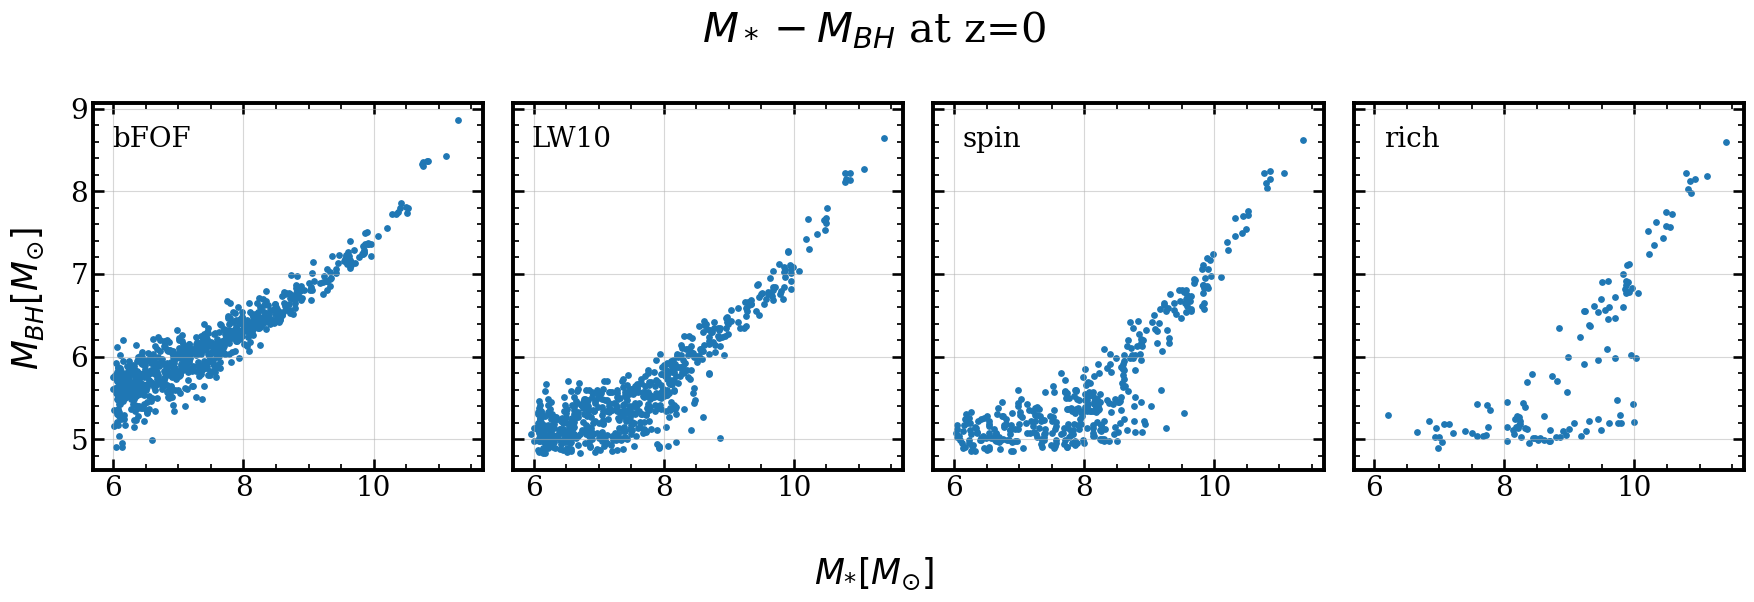

In [19]:
f,axs = plt.subplots(1,4,sharey = True,sharex = True,figsize = (18,6))

axs[0].scatter(np.log10(MstarsbFOF),np.log10(MBHbFOF),s=15)#,color='black')
axs[1].scatter(np.log10(MstarsLW10),np.log10(MBHLW10),s=15)#,color='black')
axs[2].scatter(np.log10(Mstarsspin),np.log10(MBHspin),s=15)#,color='black')
axs[3].scatter(np.log10(Mstarsrich),np.log10(MBHrich),s=15)#,color='black')

axs[0].text(0.15, 0.9, 'bFOF', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes,size=20)
axs[1].text(0.15, 0.9, 'LW10', horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes,size=20)
axs[2].text(0.15, 0.9, 'spin', horizontalalignment='center', verticalalignment='center', transform=axs[2].transAxes,size=20)
axs[3].text(0.15, 0.9, 'rich', horizontalalignment='center', verticalalignment='center', transform=axs[3].transAxes,size=20)

f.supxlabel('$M_{*} [M_{\odot}]$',size=25)
f.supylabel('$M_{BH} [M_{\odot}]$',size=25)

for ax in axs:
    ax.grid(alpha=0.5)
    
f.suptitle('$M_*-M_{BH}$ at z=0',size=30)
f.tight_layout()

plt.savefig('Plots/Z0_Mstar_M_BH.png')

In [13]:
bFOFz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z5')
LW10z5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z5')
spinz5 = ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z5')
richz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z5')

MstarsbFOF = [np.sum(bFOFz5[1][i]) for i in range(len(bFOFz5[1]))]
MstarsLW10 = [np.sum(LW10z5[1][i]) for i in range(len(LW10z5[1]))]
Mstarsspin = [np.sum(spinz5[1][i]) for i in range(len(spinz5[1]))]
Mstarsrich = [np.sum(richz5[1][i]) for i in range(len(richz5[1]))]

MBHbFOF = bFOFz5[0]
MBHLW10 = LW10z5[0]
MBHspin = spinz5[0]
MBHrich = richz5[0]

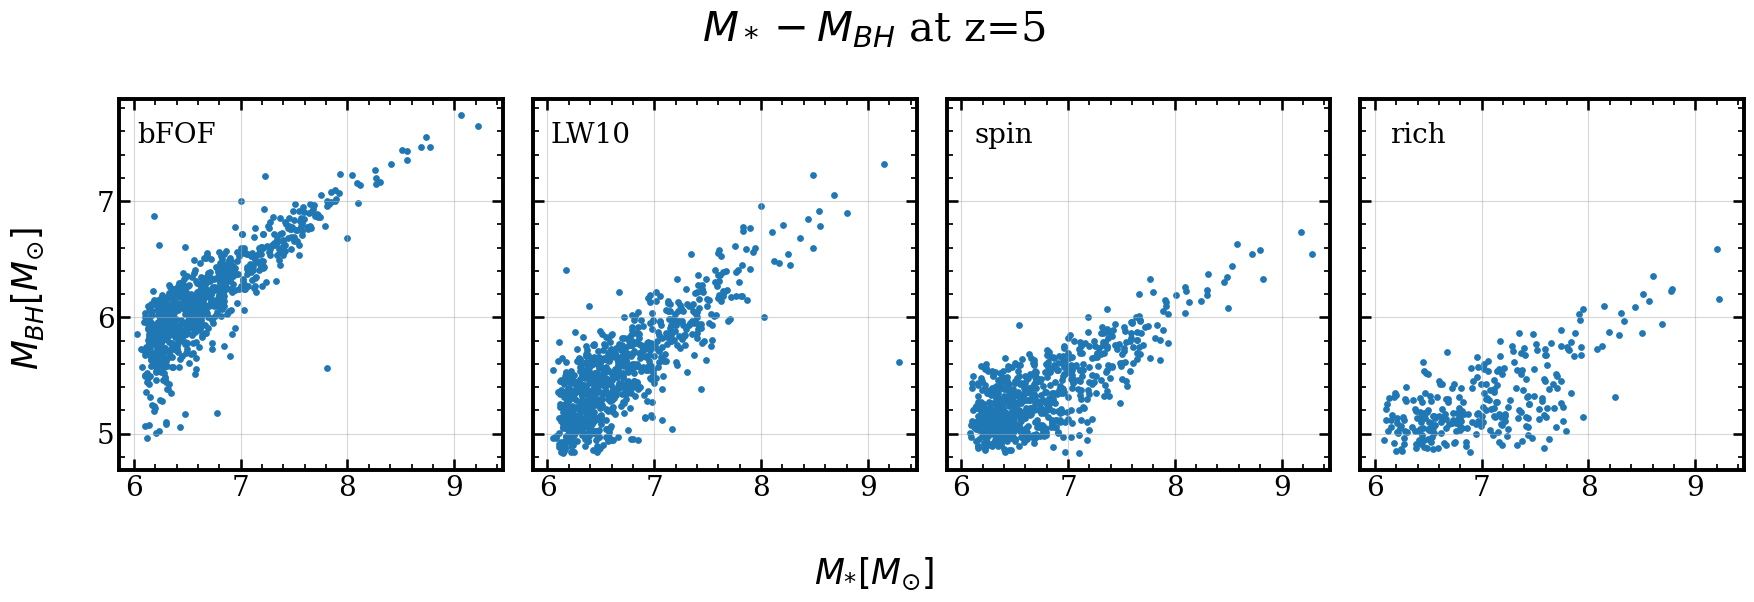

In [14]:
f,axs = plt.subplots(1,4,sharey = True,sharex = True,figsize = (18,6))

axs[0].scatter(np.log10(MstarsbFOF),np.log10(MBHbFOF),s=15)#,color='black')
axs[1].scatter(np.log10(MstarsLW10),np.log10(MBHLW10),s=15)#,color='black')
axs[2].scatter(np.log10(Mstarsspin),np.log10(MBHspin),s=15)#,color='black')
axs[3].scatter(np.log10(Mstarsrich),np.log10(MBHrich),s=15)#,color='black')

axs[0].text(0.15, 0.9, 'bFOF', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes,size=20)
axs[1].text(0.15, 0.9, 'LW10', horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes,size=20)
axs[2].text(0.15, 0.9, 'spin', horizontalalignment='center', verticalalignment='center', transform=axs[2].transAxes,size=20)
axs[3].text(0.15, 0.9, 'rich', horizontalalignment='center', verticalalignment='center', transform=axs[3].transAxes,size=20)

f.supxlabel('$M_{*} [M_{\odot}]$',size=25)
f.supylabel('$M_{BH} [M_{\odot}]$',size=25)

for ax in axs:
    ax.grid(alpha=0.5)
    
f.suptitle('$M_*-M_{BH}$ at z=5',size=30)
f.tight_layout()

plt.savefig('Plots/Z5_Mstar_M_BH.png')

### Now doing the binning

In [5]:
bFOFz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
LW10z0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z0')
spinz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z0')
richz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z0')

bFOFz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z5')
LW10z5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z5')
spinz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z5')
richz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z5')

# Illustris and TNG 
Illz0=ReadBrahmaData('Brahma_Data/Illustris_z0')
TNGz0=ReadBrahmaData('Brahma_Data/TNG_z0')

Illz5=ReadBrahmaData('Brahma_Data/Illustris_z5')
TNGz5=ReadBrahmaData('Brahma_Data/TNG_z5')

In [6]:
MstarsbFOFz0 = [np.sum(bFOFz0[1][i]) for i in range(len(bFOFz0[1]))]
MstarsLW10z0 = [np.sum(LW10z0[1][i]) for i in range(len(LW10z0[1]))]
Mstarsspinz0 = [np.sum(spinz0[1][i]) for i in range(len(spinz0[1]))]
Mstarsrichz0 = [np.sum(richz0[1][i]) for i in range(len(richz0[1]))]

MstarsbFOFz5 = [np.sum(bFOFz5[1][i]) for i in range(len(bFOFz5[1]))]
MstarsLW10z5 = [np.sum(LW10z5[1][i]) for i in range(len(LW10z5[1]))]
Mstarsspinz5 = [np.sum(spinz5[1][i]) for i in range(len(spinz5[1]))]
Mstarsrichz5 = [np.sum(richz5[1][i]) for i in range(len(richz5[1]))]

In [7]:
# List of BH Masses
Prop2list=[[np.array(bFOFz5[0]),np.array(bFOFz0[0])],[np.array(LW10z5[0]),np.array(LW10z0[0])],
           [np.array(spinz5[0]),np.array(spinz0[0])],[np.array(richz5[0]),np.array(richz0[0])]]

# List of Mstars
Prop1list=[[np.array(MstarsbFOFz5),np.array(MstarsbFOFz0)],[np.array(MstarsLW10z5),np.array(MstarsLW10z0)],
           [np.array(Mstarsspinz5),np.array(Mstarsspinz0)],[np.array(Mstarsrichz5),np.array(Mstarsrichz0)]]

# list of redshifts; not sure why I put this here. Is this necessary?
outputz_list = [[4.995933468164624, 2.220446049250313e-16],[4.995933468164624, 2.220446049250313e-16],
                [4.995933468164624, 2.220446049250313e-16],[4.995933468164624, 2.220446049250313e-16]]

# Limits for making plot in log space
limits=[5.8,12.1]

In [8]:
redshifts=[5,0]
AllBoxMeans,AllBoxStdDevs,Xpoints = mean_trends(Prop1list,Prop2list,redshifts,limits,bins=10)

/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in s

In [10]:
# Binning as above for Illustris and Illustris TNG
MStar_Illz0 = [np.sum(Illz0[2][i]) for i in range(len(Illz0[2]))]
MStar_TNGz0 = [np.sum(TNGz0[2][i]) for i in range(len(TNGz0[2]))]

MStar_Illz5 = [np.sum(Illz5[2][i]) for i in range(len(Illz5[2]))]
MStar_TNGz5 = [np.sum(TNGz5[2][i]) for i in range(len(TNGz5[2]))]

IllProp1 = [[np.array(MStar_Illz5),np.array(MStar_Illz0)],[np.array(MStar_TNGz5),np.array(MStar_TNGz0)]]
IllProp2 = [[np.array(Illz5[0]),np.array(Illz0[0])],[np.array(TNGz5[0]),np.array(TNGz0[0])]]

redshiftIll = [5,0]

Ill_TNG_means,Ill_TNG_StdDevs,ILL_TNG_Xpoints = mean_trends(IllProp1,IllProp2,redshiftIll,limits,bins=10)

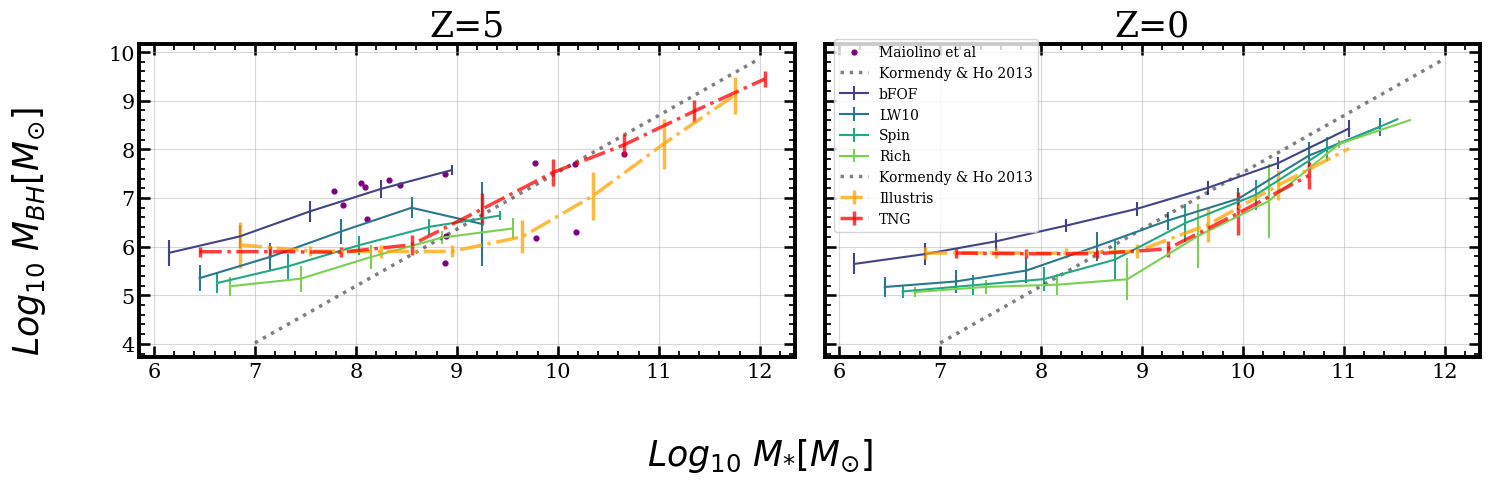

In [11]:
legend_names = ['bFOF','LW10','Spin','Rich']
axislabels = ['$Log_{10}\ M_{*} [M_{\odot}]$','$Log_{10}\ M_{BH} [M_{\odot}]$ ']
tick_size=15
label_font_size=25
cmap = plt.get_cmap('viridis') # Choose uniform luminosity cmap

# f,axes=plot_brahma(AllBoxMeans,AllBoxStdDevs,Xpoints,redshifts,legend_names,axislabels,savefig = False)

f,axes = plt.subplots(1,2,figsize=(15,5),sharey=True,sharex=True)

for i in range(AllBoxMeans.shape[0]):
        for ii in range(len(redshifts)):
            
            if ii == 0:
                # There is probably a better solution to this, but I don't want to duplicate labels
                axes[ii].errorbar(Xpoints[i],AllBoxMeans[i,ii,:],yerr = AllBoxStdDevs[i,ii,:],
                                  label=legend_names[i],color = cmap(0.2+i*(0.8/AllBoxMeans.shape[0])))
            else:
                axes[ii].errorbar(Xpoints[i],AllBoxMeans[i,ii,:],yerr = AllBoxStdDevs[i,ii,:],
                                  color = cmap(0.2+i*(0.8/AllBoxMeans.shape[0])))

# Change the alpha and colors to make everything visible

axes.flat[0].scatter(Maiolino_x_M_Mstar,Maiolino_y_M_Mstar,label='Maiolino et al',color='purple',s=12) 

# Index for labeling figure titles
n=0

for ax in axes.flat:
    # ax.set_xlim(0.6,3.0)
    # ax.set_ylim(4,10)
    ax.grid(alpha = 0.5)
    ax.tick_params(labelsize=tick_size)
    ax.set_title('Z={}'.format(redshifts[n]),size = 25)
    ax.plot(xfit_M_Mstar,KH13_M_Mstar_yfit[0],label='Kormendy & Ho 2013',ls='dotted',lw=2.5,alpha=0.5,color='black')
    n+=1
    
    if ax==axes.flat[1]:
        
        ax.errorbar(ILL_TNG_Xpoints[0],Ill_TNG_means[0][0],Ill_TNG_StdDevs[0][0],
                      label='Illustris',lw=2.5,ls='dashdot',color='orange',alpha=0.75)
        ax.errorbar(ILL_TNG_Xpoints[1],Ill_TNG_means[1][0],Ill_TNG_StdDevs[1][0],
                      label='TNG',lw=2.5,ls='dashdot',color='red',alpha=0.75)
    #     # ax.plot(x,TNGy[0],label='TNG Best Fit',ls='--',lw=2.5,alpha=0.75)
    #     # ax.plot(x,y[0],label='Illustris Best Fit',ls='--',lw=2.5,alpha=0.75)
    #     # ax.plot(xfit_M_Mstar,KH13_M_Mstar_yfit[0],label='Kormendy & Ho 2013',ls='dotted',lw=2.5,alpha=0.5,color='black')
    
    else: 
        ax.errorbar(ILL_TNG_Xpoints[0],Ill_TNG_means[0][1],Ill_TNG_StdDevs[0][1],
                      lw=2.5,ls='dashdot',color='orange',alpha=0.75)
        ax.errorbar(ILL_TNG_Xpoints[1],Ill_TNG_means[1][1],Ill_TNG_StdDevs[1][1],
                      lw=2.5,ls='dashdot',color='red',alpha=0.75)
    #     # ax.plot(x,TNGy[0],ls='--',lw=2.5,alpha=0.75)
    #     # ax.plot(x,y[0],ls='--',lw=2.5,alpha=0.75)
    #     ax.plot(xfit,KH13_yfit[0],ls='dashdot',lw=2.5,alpha=0.5,color='black')
        
f.supxlabel('{}'.format(axislabels[0]),fontsize=label_font_size)
f.supylabel('{}'.format(axislabels[1]),fontsize=label_font_size,x=0)
f.legend(fontsize = 10,loc=[0.56,0.52])
plt.subplots_adjust(wspace=0.05)
plt.tight_layout()
plt.savefig('Plots/Brahma_MBH_Mstar_binned.png')

# Binned Mstar-Sigma

In [5]:
bFOFz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
LW10z0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z0')
spinz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z0')
richz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z0')

bFOFz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z5')
LW10z5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z5')
spinz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z5')
richz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z5')

# Illustris and TNG
Illz0=ReadBrahmaData('Brahma_Data/Illustris_z0')
TNGz0=ReadBrahmaData('Brahma_Data/TNG_z0')

Illz5=ReadBrahmaData('Brahma_Data/Illustris_z5')
TNGz5=ReadBrahmaData('Brahma_Data/TNG_z5')

In [6]:
# Scale factor to convert to peculiar velocities
a = 1/(1+5) # For redshift z=5; a=1 for z=0

# Storing the x sigma's
Sigma_bFOFz0 = np.array(bFOFz0[5])[:,0]
Sigma_LW10z0 = np.array(LW10z0[5])[:,0]
Sigma_spinz0 = np.array(spinz0[5])[:,0]
Sigma_richz0 = np.array(richz0[5])[:,0]

Sigma_bFOFz5 = np.array(bFOFz5[5])[:,0]*a
Sigma_LW10z5 = np.array(LW10z5[5])[:,0]*a
Sigma_spinz5 = np.array(spinz5[5])[:,0]*a
Sigma_richz5 = np.array(richz5[5])[:,0]*a

MstarsbFOFz0 = [np.sum(bFOFz0[1][i]) for i in range(len(bFOFz0[1]))]
MstarsLW10z0 = [np.sum(LW10z0[1][i]) for i in range(len(LW10z0[1]))]
Mstarsspinz0 = [np.sum(spinz0[1][i]) for i in range(len(spinz0[1]))]
Mstarsrichz0 = [np.sum(richz0[1][i]) for i in range(len(richz0[1]))]

MstarsbFOFz5 = [np.sum(bFOFz5[1][i]) for i in range(len(bFOFz5[1]))]
MstarsLW10z5 = [np.sum(LW10z5[1][i]) for i in range(len(LW10z5[1]))]
Mstarsspinz5 = [np.sum(spinz5[1][i]) for i in range(len(spinz5[1]))]
Mstarsrichz5 = [np.sum(richz5[1][i]) for i in range(len(richz5[1]))]

In [7]:
# List of Stellar masses
Prop2list=[[np.array(MstarsbFOFz5),np.array(MstarsbFOFz0)],[np.array(MstarsLW10z5),np.array(MstarsLW10z0)],
           [np.array(Mstarsspinz5),np.array(Mstarsspinz0)],[np.array(Mstarsrichz5),np.array(Mstarsrichz0)]]

# List of sigmas
Prop1list=[[Sigma_bFOFz5,Sigma_bFOFz0],[Sigma_LW10z5,Sigma_LW10z0],
           [Sigma_spinz5,Sigma_spinz0],[Sigma_richz5,Sigma_richz0]]

# Limits for making plot in log space
limits=[0.6,2.6]

In [8]:
redshifts=[5,0]
AllBoxMeans,AllBoxStdDevs,Xpoints = mean_trends(Prop1list,Prop2list,redshifts,limits,bins=10)

/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in divide
 

In [9]:
# Binning as above for Illustris and Illustris TNG
Sigma_Illz0 = np.array(Illz0[4])[:,0]
Sigma_TNGz0 = np.array(TNGz0[4])[:,0]
Sigma_Illz5 = np.array(Illz5[4])[:,0]
Sigma_TNGz5 = np.array(TNGz5[4])[:,0]

MStar_Illz0 = [np.sum(Illz0[2][i]) for i in range(len(Illz0[2]))]
MStar_TNgz0 = [np.sum(TNGz0[2][i]) for i in range(len(TNGz0[2]))]
MStar_Illz5 = [np.sum(Illz5[2][i]) for i in range(len(Illz5[2]))]
MStar_TNgz5 = [np.sum(TNGz5[2][i]) for i in range(len(TNGz5[2]))]

IllProp2 = [[np.array(MStar_Illz5),np.array(MStar_Illz0)],[np.array(MStar_TNgz5),np.array(MStar_TNgz0)]]
IllProp1 = [[Sigma_Illz5,Sigma_Illz0],[Sigma_TNGz5,Sigma_TNGz0]]

redshiftIll = [5,0]

Ill_TNG_means,Ill_TNG_StdDevs,ILL_TNG_Xpoints = mean_trends(IllProp1,IllProp2,redshiftIll,limits,bins=10)

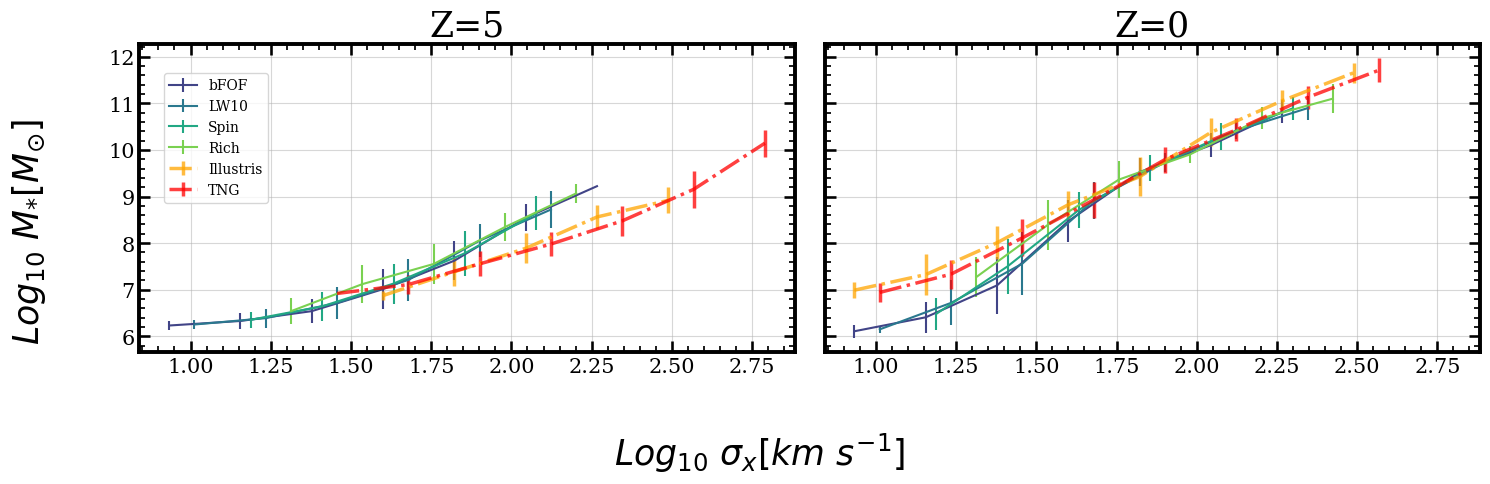

In [10]:
legend_names = ['bFOF','LW10','Spin','Rich']
axislabels = ['$Log_{10}\ \sigma_x [km\ s^{-1}]$','$Log_{10}\ M_{*} [M_{\odot}]$ ']
tick_size=15
label_font_size=25
cmap = plt.get_cmap('viridis') # Choose uniform luminosity cmap

# f,axes=plot_brahma(AllBoxMeans,AllBoxStdDevs,Xpoints,redshifts,legend_names,axislabels,savefig = False)

f,axes = plt.subplots(1,2,figsize=(15,5),sharey=True,sharex=True)

for i in range(AllBoxMeans.shape[0]):
        for ii in range(len(redshifts)):
            
            if ii == 0:
                # There is probably a better solution to this, but I don't want to duplicate labels
                axes[ii].errorbar(Xpoints[i],AllBoxMeans[i,ii,:],yerr = AllBoxStdDevs[i,ii,:],
                                  label=legend_names[i],color = cmap(0.2+i*(0.8/AllBoxMeans.shape[0])))
            else:
                axes[ii].errorbar(Xpoints[i],AllBoxMeans[i,ii,:],yerr = AllBoxStdDevs[i,ii,:],
                                  color = cmap(0.2+i*(0.8/AllBoxMeans.shape[0])))

# Change the alpha and colors to make everything visible

# axes.flat[0].scatter(Maiolino_x,Maiolino_y,label='Maiolino et al',color='purple',s=10) 

# Index for labeling figure titles
n=0

for ax in axes.flat:
    # ax.set_xlim(0.6,3.0)
    # ax.set_ylim(4,10)
    ax.grid(alpha = 0.5)
    ax.tick_params(labelsize=tick_size)
    ax.set_title('Z={}'.format(redshifts[n]),size = 25)
    n+=1
    
    if ax==axes.flat[0]:
        ax.errorbar(ILL_TNG_Xpoints[0],Ill_TNG_means[0][0],Ill_TNG_StdDevs[0][0],
                      label='Illustris',lw=2.5,ls='dashdot',color='orange',alpha=0.75)
        ax.errorbar(ILL_TNG_Xpoints[1],Ill_TNG_means[1][0],Ill_TNG_StdDevs[1][0],
                      label='TNG',lw=2.5,ls='dashdot',color='red',alpha=0.75)
    #     # ax.plot(x,TNGy[0],label='TNG Best Fit',ls='--',lw=2.5,alpha=0.75)
    #     # ax.plot(x,y[0],label='Illustris Best Fit',ls='--',lw=2.5,alpha=0.75)
    #     # ax.plot(xfit,KH13_yfit[0],label='Kormendy & Ho 2013 z=0',ls='dotted',lw=2.5,alpha=0.5,color='black')
    else: 
        ax.errorbar(ILL_TNG_Xpoints[0],Ill_TNG_means[0][1],Ill_TNG_StdDevs[0][1],
                      lw=2.5,ls='dashdot',color='orange',alpha=0.75)
        ax.errorbar(ILL_TNG_Xpoints[1],Ill_TNG_means[1][1],Ill_TNG_StdDevs[1][1],
                      lw=2.5,ls='dashdot',color='red',alpha=0.75)
    #     # ax.plot(x,TNGy[0],ls='--',lw=2.5,alpha=0.75)
    #     # ax.plot(x,y[0],ls='--',lw=2.5,alpha=0.75)
    #     # ax.plot(xfit,KH13_yfit[0],ls='dashdot',lw=2.5,alpha=0.5,color='black')
        
f.supxlabel('{}'.format(axislabels[0]),fontsize=label_font_size)
f.supylabel('{}'.format(axislabels[1]),fontsize=label_font_size,x=0)
f.legend(fontsize = 10,loc=[0.11,0.58])
plt.subplots_adjust(wspace=0.05)
plt.tight_layout()
plt.savefig('Plots/Brahma_Mstar_Sigma_binned.png')

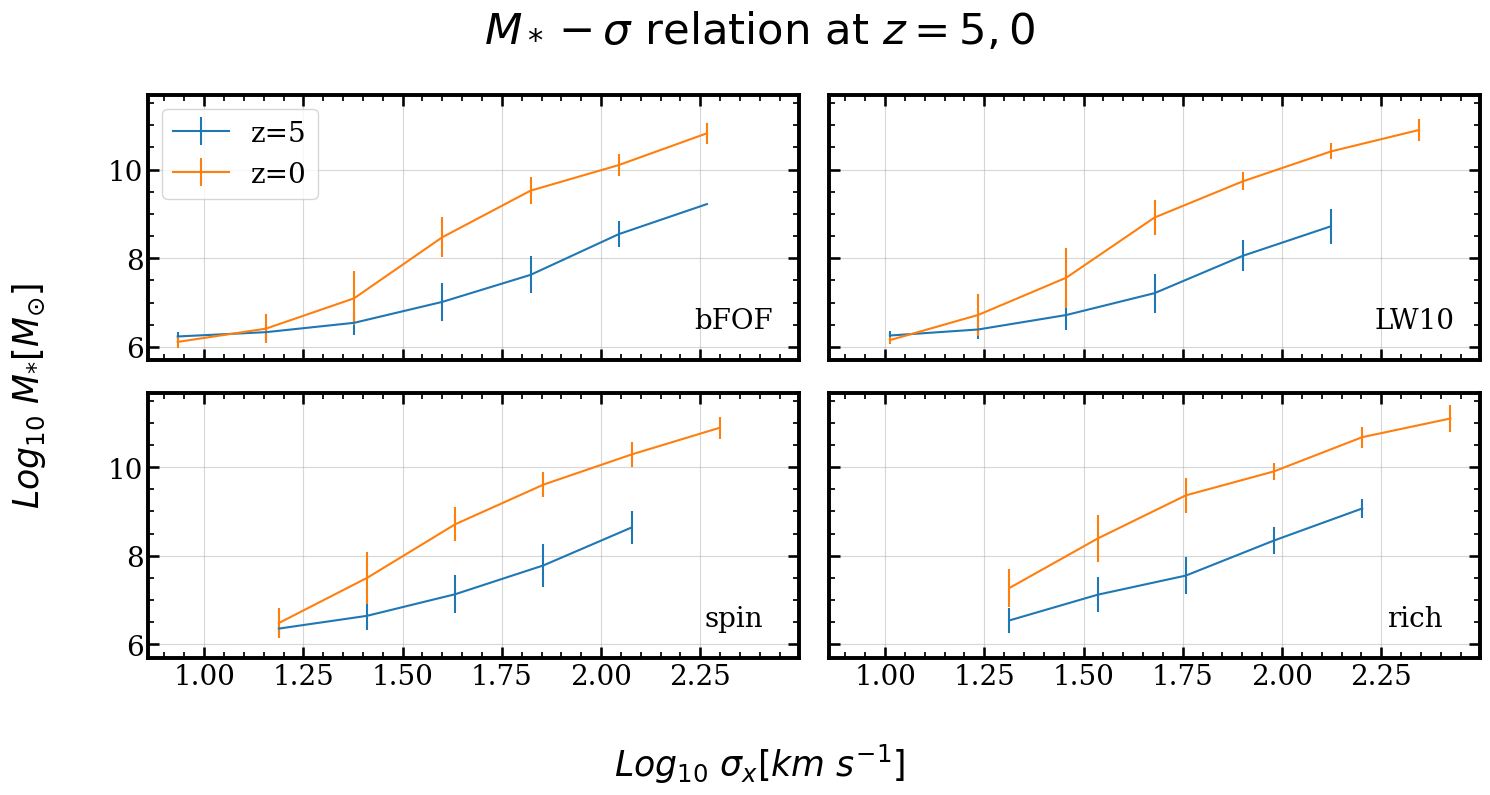

In [36]:
# Making 4 panel version

# legend_names = ['bFOF','LW10','Spin','Rich']
axislabels = ['$Log_{10}\ \sigma_x [km\ s^{-1}]$','$Log_{10}\ M_{*} [M_{\odot}]$ ']
tick_size=15
label_font_size=25
cmap = plt.get_cmap('viridis')

f,axes = plt.subplots(2,2,figsize=(15,8),sharey=True,sharex=True)

axes[0,0].errorbar(Xpoints[0],AllBoxMeans[0,0,:],yerr = AllBoxStdDevs[0,0,:],label='z=5')
axes[0,1].errorbar(Xpoints[1],AllBoxMeans[1,0,:],yerr = AllBoxStdDevs[1,0,:],label='z=5')
axes[1,0].errorbar(Xpoints[2],AllBoxMeans[2,0,:],yerr = AllBoxStdDevs[2,0,:],label='z=5')
axes[1,1].errorbar(Xpoints[3],AllBoxMeans[3,0,:],yerr = AllBoxStdDevs[3,0,:],label='z=5')

axes[0,0].errorbar(Xpoints[0],AllBoxMeans[0,1,:],yerr = AllBoxStdDevs[0,1,:],label='z=0')
axes[0,1].errorbar(Xpoints[1],AllBoxMeans[1,1,:],yerr = AllBoxStdDevs[1,1,:],label='z=0')
axes[1,0].errorbar(Xpoints[2],AllBoxMeans[2,1,:],yerr = AllBoxStdDevs[2,1,:],label='z=0')
axes[1,1].errorbar(Xpoints[3],AllBoxMeans[3,1,:],yerr = AllBoxStdDevs[3,1,:],label='z=0')

axes[0,0].text(0.9, 0.15, 'bFOF', horizontalalignment='center', verticalalignment='center', transform=axes[0,0].transAxes,size=20)
axes[0,1].text(0.9, 0.15, 'LW10', horizontalalignment='center', verticalalignment='center', transform=axes[0,1].transAxes,size=20)
axes[1,0].text(0.9, 0.15, 'spin', horizontalalignment='center', verticalalignment='center', transform=axes[1,0].transAxes,size=20)
axes[1,1].text(0.9, 0.15, 'rich', horizontalalignment='center', verticalalignment='center', transform=axes[1,1].transAxes,size=20)

axes[0,0].legend()

for ax in axes.flat:
    ax.grid(alpha=0.5)
    # ax.legend()
    
f.supxlabel('{}'.format(axislabels[0]),fontsize=label_font_size)
f.supylabel('{}'.format(axislabels[1]),fontsize=label_font_size,x=0)
f.suptitle(r'$M_*-\sigma\ \mathrm{relation\ at}\ z=5, 0$',size=1.25*label_font_size)
# f.legend(fontsize = 10,loc=[0.11,0.58])
plt.subplots_adjust(wspace=0.05)
plt.tight_layout()
plt.savefig('Plots/Brahma_Mstar_Sigma_4_panels.png')